In [272]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import matplotlib.dates as mdates


In [273]:
# about experiment
data = pd.read_csv('jobs.csv')

In [274]:
# truncate micro and nano seconds so that we create seconds level buckets
# This is how we detect overlap of parallel jobs per-node
data['started_datetime'] = pd.to_datetime(data['started']).apply(lambda t: t.replace(microsecond=0, nanosecond=0))
data['finished_datetime'] = pd.to_datetime(data.finished).apply(lambda t: t.replace(microsecond=0, nanosecond=0))

subset = data[['execution_node', 'started_datetime', 'finished_datetime', 'id']]
data['duration_datetime'] = [pd.date_range(e[1], e[2], freq='1S') for e in subset.values]

In [275]:
# De-normalize the date ranges in 1 second buckets
subset = data[['execution_node', 'started_datetime', 'finished_datetime', 'id', 'duration_datetime']]

inflated = {
    'execution_node': [],
    'time': [],
    'id': [],
}
for d in subset.values:
    #print(d[0])
    for t in d[4]:
        inflated['execution_node'].append(d[0])
        inflated['time'].append(t)
        inflated['id'].append(d[3])
df = pd.DataFrame(data=inflated)

In [276]:
# For each second, calculate the number of running jobs.
df2 = df.groupby(['time','execution_node']).size().reset_index().rename(columns={0:'running_jobs_count'})
df2.sort_values('running_jobs_count', ascending=False)

,time,execution_node,running_jobs_count
1760,2018-05-18 20:03:09,awx-1-t39w2,13
1756,2018-05-18 20:03:08,awx-1-t39w2,13
1752,2018-05-18 20:03:07,awx-1-t39w2,13
1748,2018-05-18 20:03:06,awx-1-t39w2,13
1744,2018-05-18 20:03:05,awx-1-t39w2,13
1740,2018-05-18 20:03:04,awx-1-t39w2,13
1604,2018-05-18 20:02:30,awx-1-t39w2,12
1648,2018-05-18 20:02:41,awx-1-t39w2,12
2725,2018-05-18 20:07:11,awx-1-2x0tf,12
1632,2018-05-18 20:02:37,awx-1-t39w2,12


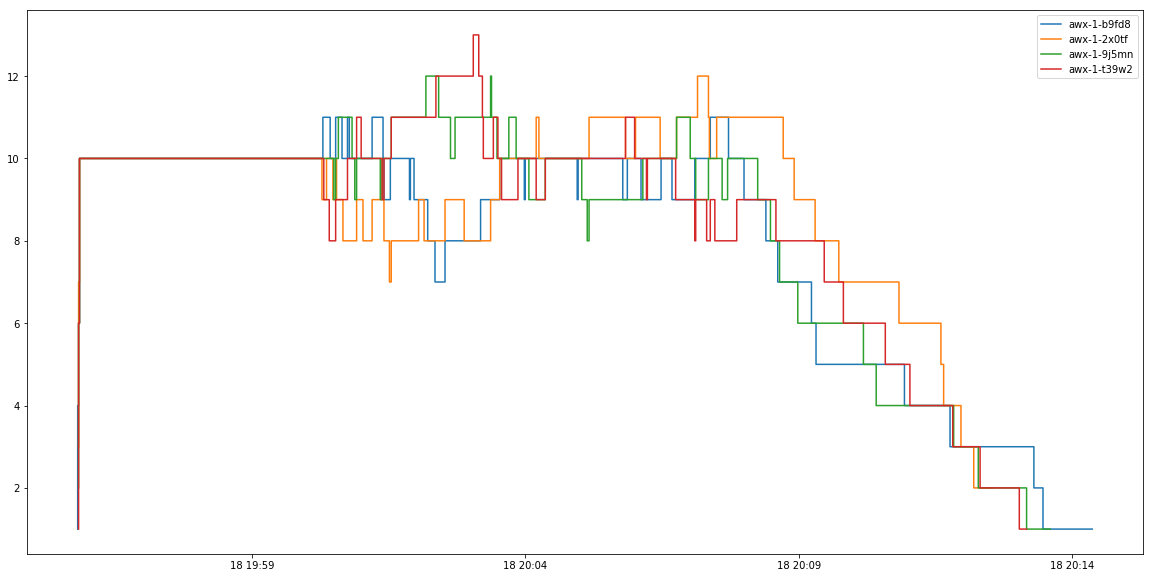

In [277]:
plt.rcParams['figure.figsize'] = [20, 10]

#fig, ax = plt.subplots()
#ax.add_collection(lc)
#ax.plot(df2['time'], df2['running_jobs_count'])
#ax.autoscale_view()
for node in df2['execution_node'].unique():
    plt.step(df2[df2.execution_node == node]['time'], df2[df2.execution_node == node]['running_jobs_count'], label=node)
plt.legend()
plt.show()